In [308]:
%matplotlib inline
import pyspeckit
import numpy as np
from astropy import units as u
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.convolution import convolve, Box1DKernel


## Basic Plotting and Fitting

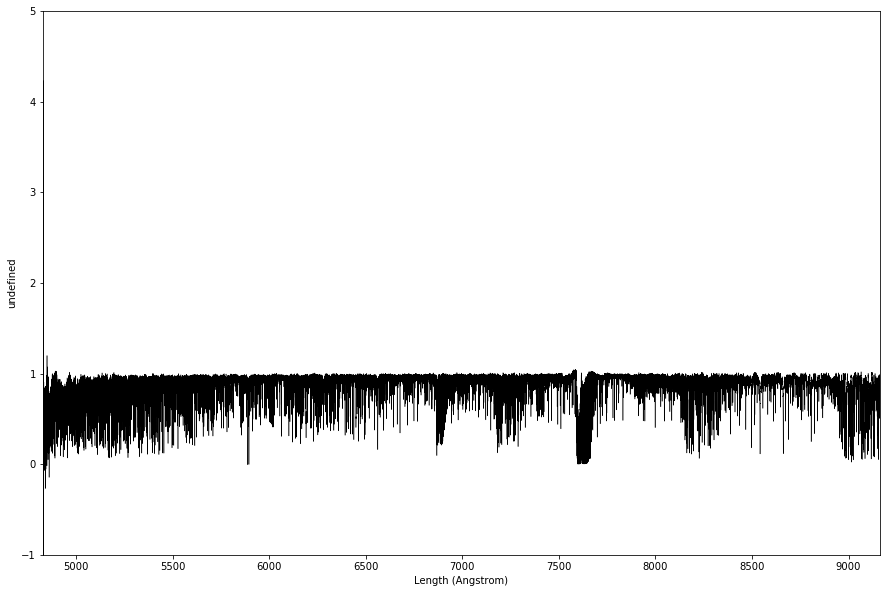

In [285]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
fig = plt.figure(figsize=(15,10))

s_data = s_hdu[1].data
s_flux = s_data['FLUX']
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(figure=fig, ymin = -1, ymax = 5)

In [286]:
#s_hdu[0].header

[ 0.66666669  1.          0.68230957 ...,  0.26774517  0.26264656
  0.17260873]


-2.07380749287


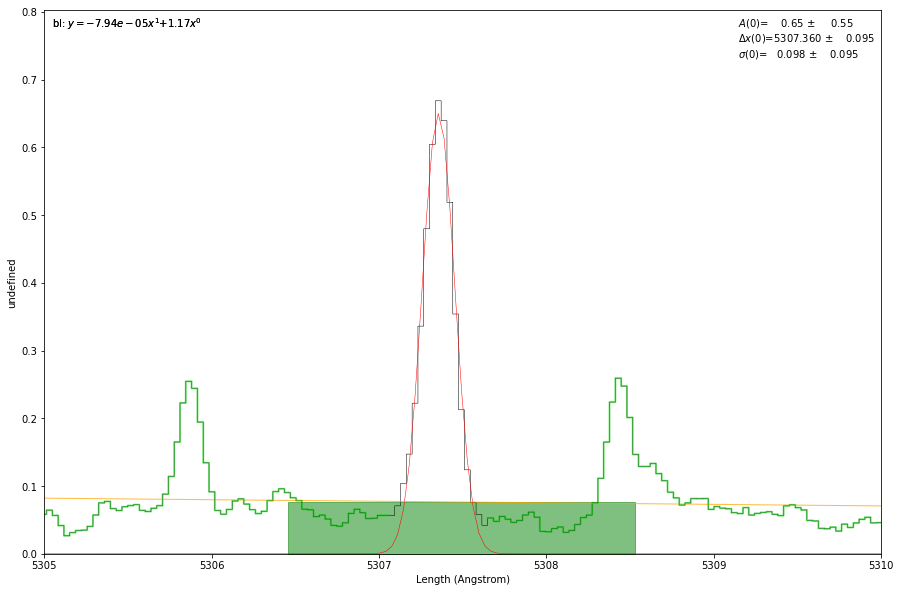

In [328]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
#spec_lpx = pd.read_csv("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14.lpx",
                       #delim_whitespace = True, header=None)
fig = plt.figure(figsize=(15,10))

s_data = s_hdu[1].data
s_flux = abs(s_data['FLUX'] - 1.)

smoothed_flux = convolve(s_flux, Box1DKernel(3))
s_flux = smoothed_flux
#s_flux = s_data['FLUX']*np.array(spec_lpx[1])
print(s_flux)
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(figure = fig, xmin=5305, xmax=5310., ymin = 0)

sp.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1])
#sp.specfit(fittype='voigt', guesses = 'moments')
sp.baseline(subtract=False, highlight_fitregion=True, excludefit = True)
print(sp.specfit.EQW(plot=True, continuum_as_baseline=True))

sp.plotter.savefig('basic_plot_example_withfit.png')

-9.38323884683


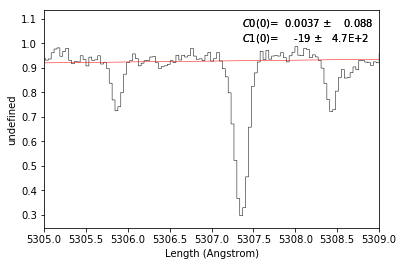

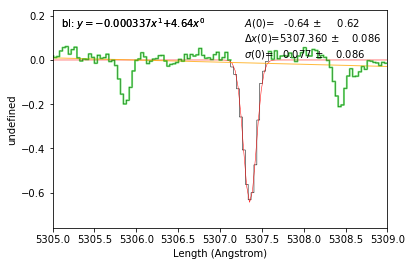

In [297]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
s_data = s_hdu[1].data
s_flux = s_data['FLUX']
s_wav = s_data['WAVEL'] * u.AA

sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(xmin=5305, xmax=5309)

sp.specfit.Registry.add_fitter('polycontinuum',
                               pyspeckit.models.polynomial_continuum.poly_fitter(),
                               2)

sp.specfit(order=2, fittype='polycontinuum', guesses=(0.9,12), exclude = [5307.1,5307.5, 5308.25, 5308.6])

sp_contsub = sp.copy()
sp_contsub.data -= sp.specfit.get_full_model()
sp_contsub.plotter()

sp_contsub.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1])



sp_contsub.baseline(subtract=False, highlight_fitregion=True, excludefit=True)
print(sp_contsub.specfit.EQW(plot=True))

#sp.specfit(fittype='gaussian', guesses = [0.5, 5307.36, 0.1])
#sp.plotter.savefig('basic_plot_example_withfit.png')

EQW: 137.58585449560962 mA


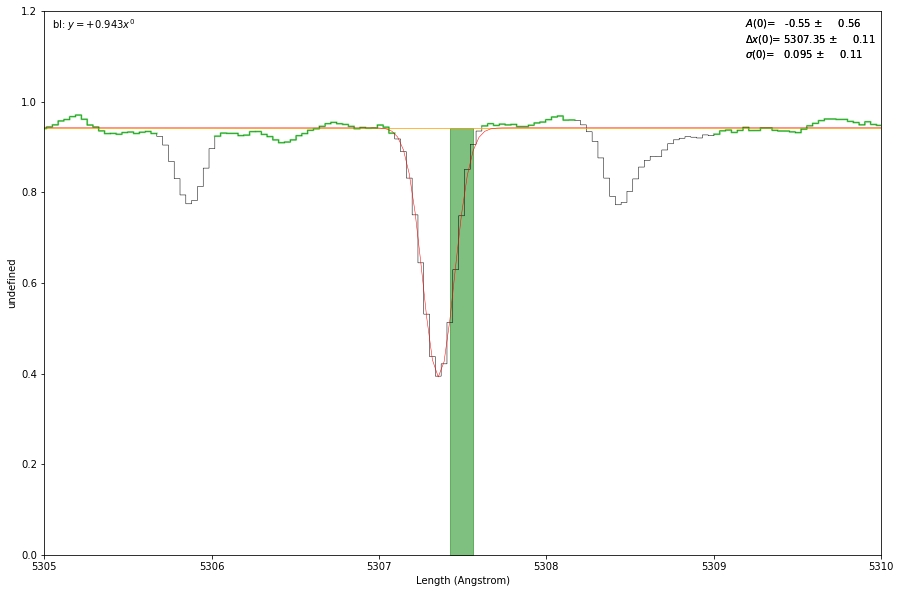

In [346]:
s_hdu = fits.open("Data/ew_known/tame_inputs/col110_1134red_oned_25jan14_wavsoln.fits")
fig = plt.figure(figsize=(15,10))

s_data = s_hdu[1].data
s_flux = s_data['FLUX']
smoothed_flux = convolve(s_flux, Box1DKernel(5))
s_flux = smoothed_flux
s_wav = s_data['WAVEL'] * u.AA
sp = pyspeckit.Spectrum(data=s_flux, xarr=s_wav)
sp.plotter(figure = fig, xmin=5305, xmax=5310., ymin=0, ymax=1.2)

sp.baseline(order=0, subtract=False, highlight_fitregion=True, exclude=[5305.7,5306,5307.1,5307.6,5308.2,5309])
sp.specfit(fittype='gaussian', guesses = [0.1, 5307.36, 0.1])
EQW = sp.specfit.EQW(plot=True, continuum = 0.95)
print("EQW:", EQW*1000*u.mA)

sp.plotter.savefig('basic_plot_example_withfit.png')